In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from tsshapelet import Shapelet

c:\Users\zqw93\AppData\Local\Programs\Python\Python311\Lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


## Vector

In [12]:
def vector_accer(csv):
    """
    This is a method to read the csv file and calculate the vector of x, y and z direction

    :csv: relative file address
    :return: dataframe of vector value
    """
    df_action = pd.read_csv(csv, skiprows = lambda x: x<=9, index_col=False)
    df_action['vm'] = (df_action['Accelerometer X']**2 + df_action['Accelerometer Y']**2 + df_action['Accelerometer Z']**2)**.5
    return df_action

# Jump
zqw_jump = vector_accer("zqw\zqwjumpRAW.csv")['vm'][250:1800]
gbq_jump = vector_accer("gbq\gbqjump.csv")['vm'][0:1800]

# Walk
zqw_walk = vector_accer("zqw\zqwwalkRAW.csv")['vm'][0: 5400]
gbq_walk = vector_accer("gbq\gbqwalk.csv")['vm'][0: 5900]

# skip
zqw_skip = vector_accer("zqw\zqwskipRAW.csv")['vm'][0: 2700]
gbq_skip = vector_accer("gbq\gbqskip.csv")['vm'][0: 1900]


## Plot

In [13]:
def plot_candidates(plot_name, df1, name1, df2, name2):
    """
    This is a method to plot candidtaes accelerometer time series data

    :plot_name: a string, plot title
    :df1: a dataframe, first candidate data
    :name1: a string, first candidate name
    :df2: a dataframe, second candidate data
    :name2: a string, second candidate name
    """
    plt.figure(figsize=(8, 6))
    ax_1 = df1.plot(label= name1)
    ax_2 = df2.plot(label=name2)
    for ax in (ax_1, ax_2) :
        ax.set_xlabel('data point')
        ax.set_ylabel('accer')
        ax.set_title(plot_name)
        ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
    # Show the plot
    plt.show()


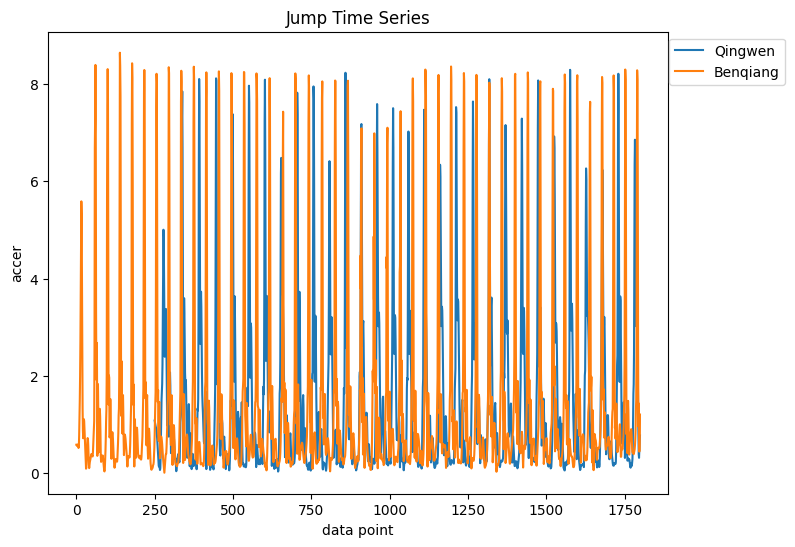

In [14]:
# Jump
plot_candidates('Jump Time Series', zqw_jump , 'Qingwen', gbq_jump, 'Benqiang')

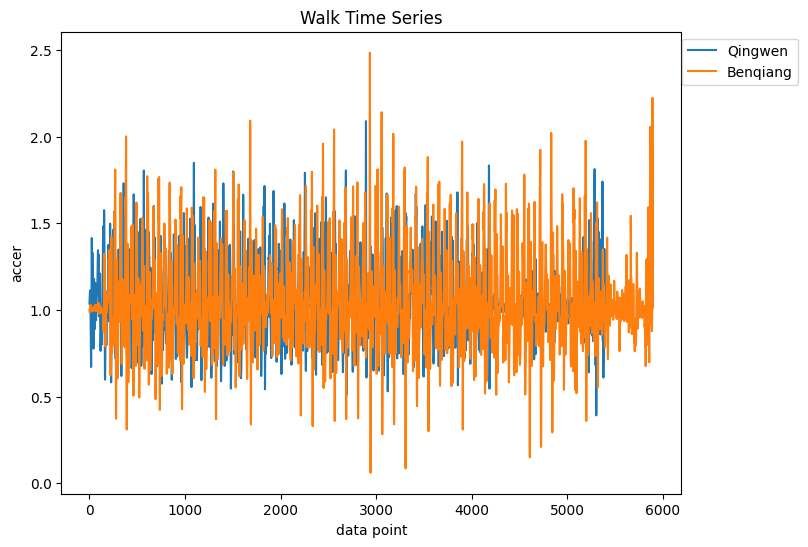

In [15]:
# Walk
plot_candidates('Walk Time Series', zqw_walk , 'Qingwen', gbq_walk, 'Benqiang')

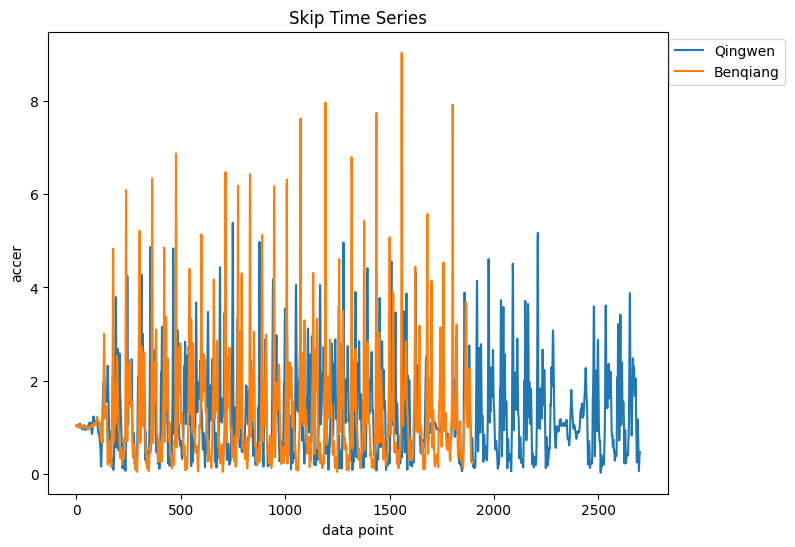

In [16]:
# skip
plot_candidates('Skip Time Series', zqw_skip , 'Qingwen', gbq_skip, 'Benqiang')

## Guess shapelet feature

<AxesSubplot: title={'center': 'Jump cycle'}>

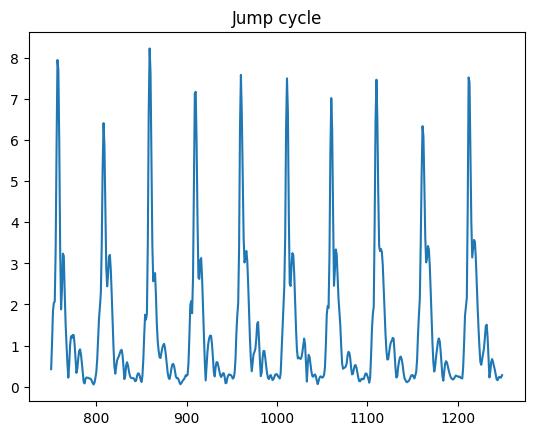

In [17]:
# Jump
zqw_jump[500: 1000].plot(title='Jump cycle')


<AxesSubplot: title={'center': 'walk cycle'}>

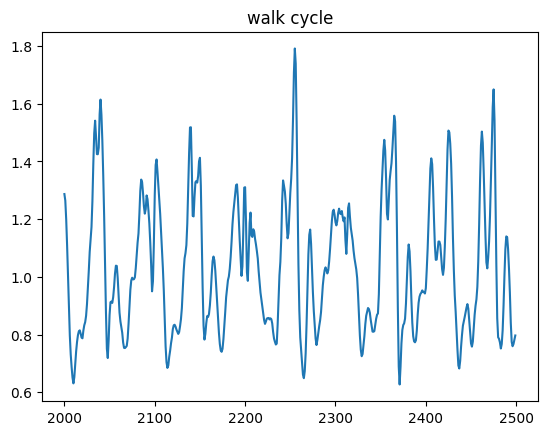

In [18]:
# Walk
zqw_walk[2000: 2500].plot(title='walk cycle')

<AxesSubplot: title={'center': 'skip cycle'}>

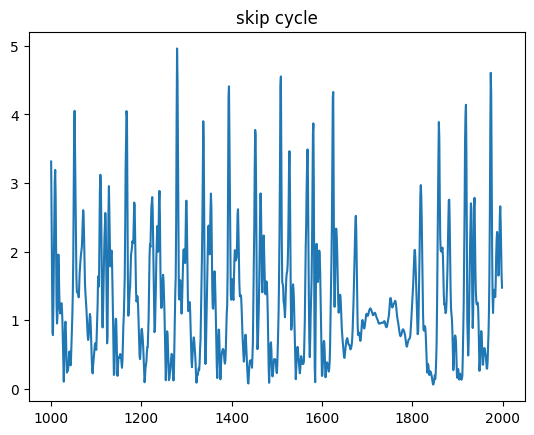

In [35]:
# Skip
zqw_skip[1000: 2000].plot(title='skip cycle')

## Extract Shapelets

In [20]:
def plot_shapelets(df_action, min_dist, thres, max_dist, title):
    """
    This is a method to extract all the candidates shapelets and plot

    :df_action: this is the vector dataframe of one action
    :min_dist: the minimum shapelet length
    :thres: percentage of the peak value
    :max_dist: the maximum shapelet length
    :title: plot title
    """
    action_shape = Shapelet(df_action)
    action_shape.series = action_shape.original
    # action_shape.smooth(3)
    action_shape.candidate_extraction(extraction='peak', min_dist=min_dist, thres=thres, max_dist=max_dist)
    action_shape.shapelet_selection(barycenter='interpolated')
    for arr in action_shape.candidates:
        plt.title(title)
        plt.plot(arr, color = 'black')
    action_rs = action_shape.shapelets[0]
    plt.plot(action_rs, lw=8)

def find_represt_shapelet(df_action, min_dist, thres, max_dist):
    """
    This is a method to find representative shapelet

    :df_action: this is the vector dataframe of one action
    :min_dist: the minimum shapelet length
    :thres: percentage of the peak value
    :max_dist: the maximum shapelet length
    :return: shapelets[0], representative shapelet
    """
    action_shape = Shapelet(df_action)
    action_shape.series = action_shape.original
    # action_shape.smooth(3)
    action_shape.candidate_extraction(extraction='peak', min_dist=min_dist, thres=thres, max_dist=max_dist)
    action_shape.shapelet_selection(barycenter='interpolated')
    return action_shape.shapelets[0]


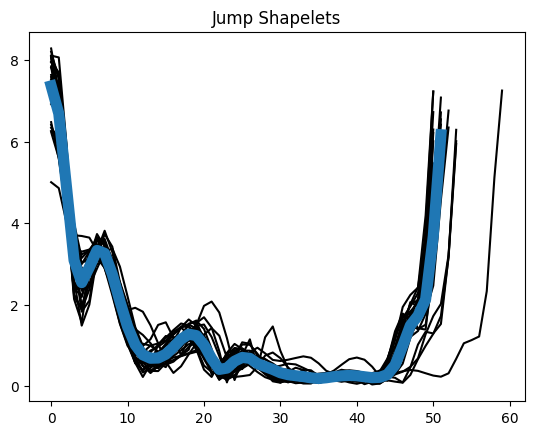

In [29]:
# Jump
plot_shapelets(zqw_jump, min_dist=50, thres=0.9, max_dist=60, title='Jump Shapelets')

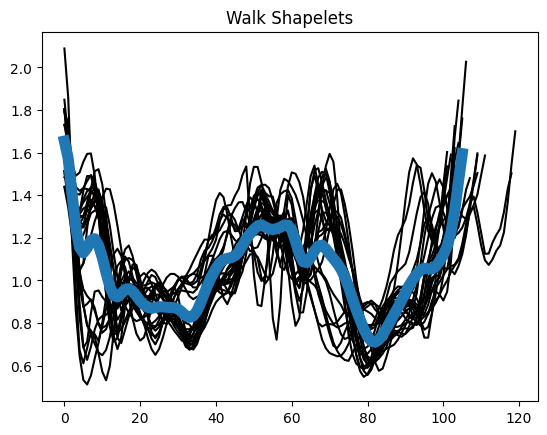

In [22]:
# Walk
plot_shapelets(zqw_walk, min_dist=100, thres=0.95, max_dist=120, title='Walk Shapelets')

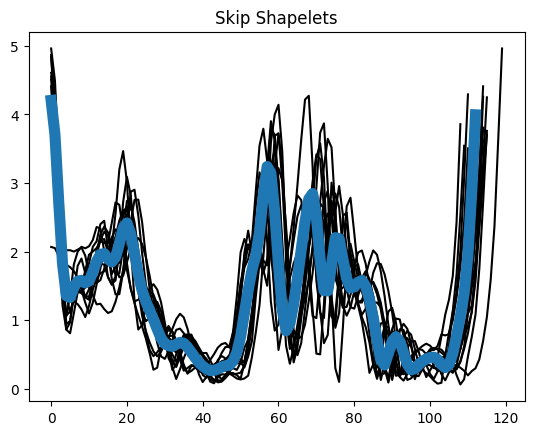

In [23]:
# Skip
plot_shapelets(zqw_skip, min_dist=100, thres=0.8, max_dist=120, title='Skip Shapelets')